# TF Syntax Basics - Part One - Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


We are going to treat this as a regression problem where based off the two features we will try to predict the price. 

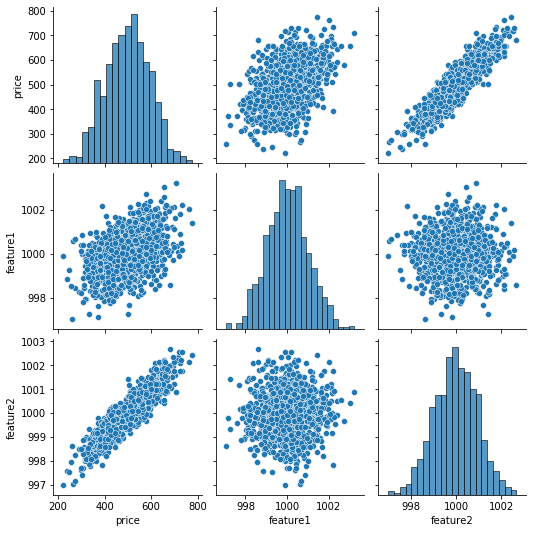

In [4]:
sns.pairplot(df)

Once you are finished exploring your data, the next thing to do is a test_train_split. 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Because of the way Keras works, we need to pass in numpy arrays rather than pandas series
# .values returns a numpy array
X = df[['feature1', 'feature2']].values

In [7]:
y = df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The next step is to normalize or scale the data. Since we are working with weights and biases in the neural network, having different scales in our data could cause errors and give us incorrect results. 

In [9]:
from sklearn.preprocessing import MinMaxScaler

You don't really need to scale the label, just the features, since that is what is being passed into the network. The label is just a comparison at the end. 

In [10]:
scaler = MinMaxScaler()

In [11]:
# .fit() just calculates the parameters it is going to need in order to scale later on
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
# This actually performs the scaling. 
X_train = scaler.transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

Now all the feature data has been scaled to be between 0 and 1. 

# TF Syntax Basics - Part Two - Creating and Training the Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
# One way to make a model - you pass in a list of the layers
# model = Sequential([Dense(4, activation='relu'),
#                    Dense(2, activation='relu'),
#                   Dense(1)])

In [16]:
# Another way to make a model  - add in layers one at a time (this is our preferred way)
# This cell and the previous actually produce the exact same model. 
# model = Sequential()

# model.add(Dense(4, activation='relu'))
# model.add(Dense(2, activation='relu'))
# model.add(Dense(1))

In [17]:
# This is the model we are going to be working with
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

# The last layer is pretyy important and you need to make sure it matches what you are trying to predict
# Since we are trying to predict a single price, we should only have one neuron in our last layer

# More information on the optimizer and the loss is in the provided lecture notes. 
model.compile(optimizer='rmsprop', loss='mse')

Now we are ready to fit the model to the training data. 

In [18]:
model.fit(x=X_train, y=y_train, epochs=250) # epochs is how many times you go through the data

Epoch 1/250
22/22 [==============================] - 0s 635us/step - loss: 256987.8906
Epoch 2/250
22/22 [==============================] - 0s 727us/step - loss: 256788.7969
Epoch 3/250
22/22 [==============================] - 0s 726us/step - loss: 256684.3438
Epoch 4/250
22/22 [==============================] - 0s 771us/step - loss: 256647.6094
Epoch 5/250
22/22 [==============================] - 0s 725us/step - loss: 256623.8906
Epoch 6/250
22/22 [==============================] - 0s 770us/step - loss: 256601.7344
Epoch 7/250
22/22 [==============================] - 0s 499us/step - loss: 256579.7656
Epoch 8/250
22/22 [==============================] - 0s 591us/step - loss: 256557.8750
Epoch 9/250
22/22 [==============================] - 0s 635us/step - loss: 256536.0156
Epoch 10/250
22/22 [==============================] - 0s 635us/step - loss: 256514.1094
Epoch 11/250
22/22 [==============================] - 0s 680us/step - loss: 256492.2500
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 725us/step - loss: 254678.9688
Epoch 95/250
22/22 [==============================] - 0s 635us/step - loss: 254657.0781
Epoch 96/250
22/22 [==============================] - 0s 635us/step - loss: 254635.2969
Epoch 97/250
22/22 [==============================] - 0s 544us/step - loss: 254613.5469
Epoch 98/250
22/22 [==============================] - 0s 453us/step - loss: 254591.7500
Epoch 99/250
22/22 [==============================] - 0s 499us/step - loss: 254569.8906
Epoch 100/250
22/22 [==============================] - 0s 544us/step - loss: 254548.0469
Epoch 101/250
22/22 [==============================] - 0s 635us/step - loss: 254526.3750
Epoch 102/250
22/22 [==============================] - 0s 680us/step - loss: 254504.5781
Epoch 103/250
22/22 [==============================] - 0s 680us/step - loss: 254482.7656
Epoch 104/250
22/22 [==============================] - 0s 725us/step - loss: 254461.0000
Epoch 105/250
22/22 [===================

22/22 [==============================] - 0s 635us/step - loss: 252676.7812
Epoch 187/250
22/22 [==============================] - 0s 635us/step - loss: 252655.1094
Epoch 188/250
22/22 [==============================] - 0s 596us/step - loss: 252633.4688
Epoch 189/250
22/22 [==============================] - 0s 725us/step - loss: 252611.6562
Epoch 190/250
22/22 [==============================] - 0s 679us/step - loss: 252589.9375
Epoch 191/250
22/22 [==============================] - 0s 634us/step - loss: 252568.2344
Epoch 192/250
22/22 [==============================] - 0s 635us/step - loss: 252546.6094
Epoch 193/250
22/22 [==============================] - 0s 635us/step - loss: 252524.8906
Epoch 194/250
22/22 [==============================] - 0s 589us/step - loss: 252503.2188
Epoch 195/250
22/22 [==============================] - 0s 589us/step - loss: 252481.4844
Epoch 196/250
22/22 [==============================] - 0s 725us/step - loss: 252459.7188
Epoch 197/250
22/22 [==============

In [19]:
loss_df = pd.DataFrame(model.history.history)

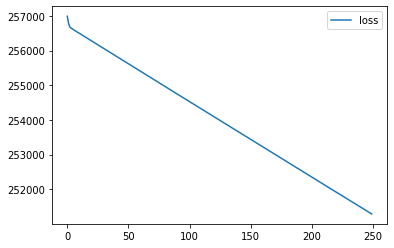

In [20]:
loss_df.plot()

# TF Syntax Basics - Part 3 - Model Evaluation

How well will this model perform on data that it has never seen before? We use our test data to figure it out. 

In [21]:
# This returns the model's loss on the test set. 
model.evaluate(X_test, y_test, verbose=0)

253687.65625

What this number represents is the metric loss that you decided on. For this example, that is mean squarred error. So, on the test data that this model has never seen before, it is getting a mean squarred error of 25.13. We can do the same thing on our training set.

In [22]:
model.evaluate(X_train, y_train, verbose=0)

251277.546875

What do these numbers actually mean? This is a way we can interprest our results to see how well the predictions are actually performing. 

In [23]:
test_predictions = model.predict(X_test)

So we passed in the X_test data and we are asking it to predict the price just based off the features. 

In [24]:
# List of the prices that are predicted based off our X_test set. 
test_predictions

array([[5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],
       [5.5060363],


Lets bring them together with the true values and plot them out to get a visual on how well the model did. 

In [25]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [26]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [27]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [28]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [29]:
pred_df

,Test True Y,Model Predictions
0,402.296319,5.506036
1,624.156198,5.506036
2,582.455066,5.506036
3,578.588606,5.506036
4,371.224104,5.506036
...,...,...
295,525.704657,5.506036
296,502.909473,5.506036
297,612.727910,5.506036
298,417.569725,5.506036


In [30]:
import matplotlib.pyplot as plt

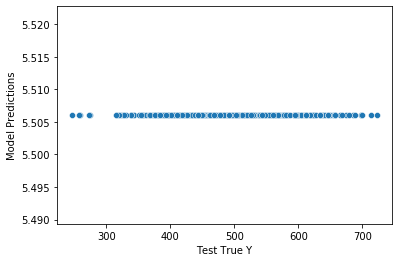

In [31]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)
plt.savefig('gem_model_eval.png', dpi=600)

So what does this actually mean? Let's imagine that our predictions were a perfect match for the true y prices. If that was the case, we would expect a perfectly straight (diagonal, y=x) line here. We are are actually pretty close, so we are doing pretty well. We can also grab metrics to show quantitatively how well it is doing. 

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

494.8693031934974

This means, on average, we are about four dollars off our price point. How do we know if this is good or bad? It depends on your original data. If you are trying to predict the price of a hour, being off by four dollars is pretty good. If you are trying to predict the price of a common candy bar, being off by four dollars is likely a huge error. 

In [34]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

253687.6589086304

This shouldn't be suprising since we calculated mean square error in the first place. 

To get the RMS, you just take the square root of the MSE.

In [35]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

503.67415946088636

Ok so now how do we use new data? Imagine we find a new gemstone and feature 1 = 998 and feature 2 = 1000. Now you want to ask your model what to price the gem at. 

First thing you have to remember is that your model is trained on the *scaled* features. So first you have to scale the data using the scaler. 

Now you can use your model to predict the price of the new gem. 

In [36]:
new_gem =[[998, 1000]]

In [37]:
new_gem = scaler.transform(new_gem)

In [38]:
model.predict(new_gem)

array([[5.5060363]], dtype=float32)

So you should price the gem at about \$420

If you want to save your model, keras makes it very easy. 

In [39]:
from tensorflow.keras.models import load_model

In [40]:
model.save('my_gem_model.h5')

In [41]:
later_model = load_model('my_gem_model.h5')

In [42]:
later_model.predict(new_gem)

array([[5.5060363]], dtype=float32)

# Keras Regression Code Along - Part 1

We are going to try to predict the price that a house should sell at. In Part 1 we are going to focus on data exploration and feature engineering. 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [44]:
df = pd.read_csv('DATA/kc_house_data.csv')

We are going to first check if we have any missing data. 

In [45]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We have no missing data, so good for us.

In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\Jared\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


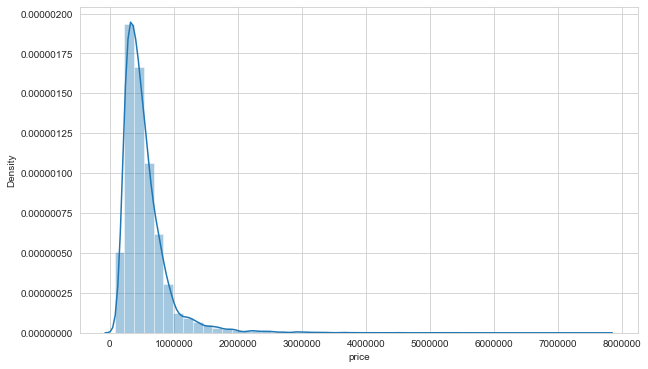

In [47]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

So it looks like most of our houses are falling between \\$0 and \\$1.5M. We also see that there are some outliers. It might be worth dropping these values if they ar every extremem and have a significant impact on our analysis. 

We can do a similar analysis on different features. 

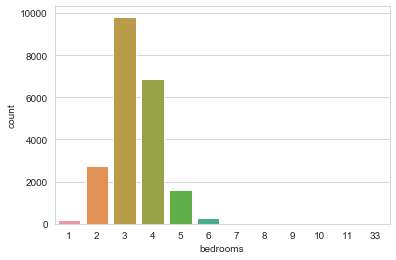

In [48]:
sns.countplot(x='bedrooms', data=df)

So it seems that there are a very small number of houses that have more than 6 bedrooms. So few in fact that we cannot even see that bar representing the count. 

What is also nice to do is to comparing your label (price) to a feature that you think has a high correlation. The corr() function allows you to begin to see what actually correlates with your label. 

In [49]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

Obviously our label will have perfect correlation with itself, but the squarefeet of the living space seems to have a high correlation to the cost of the house. We can then explore highly correlated features through a scatter plot. 

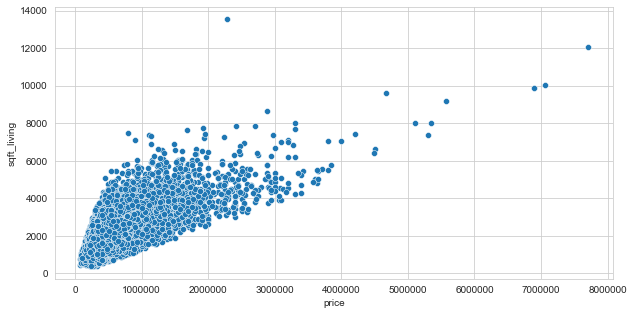

In [50]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='sqft_living', data=df)

So we see a very strong linear relationship. 

We can also do box plots to see distributions. 

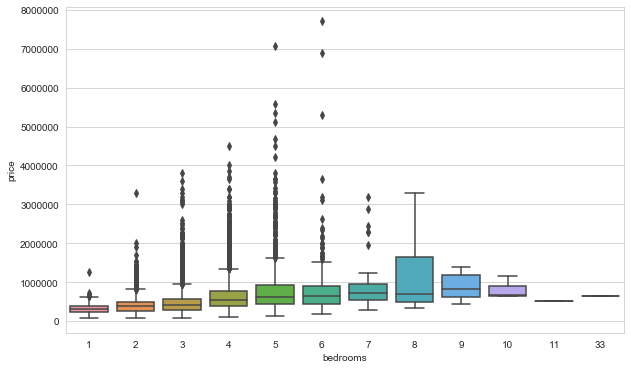

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df)

We should notice in our data that we have the latitude and the longitude of the homes. We don't need to worry about actually plotting these on a geographical map, but we can gain a lot of information with a little information on what King County looks like combined with a simple scatter plot. So let's see the distribution of prices per latitude vs longitude. 

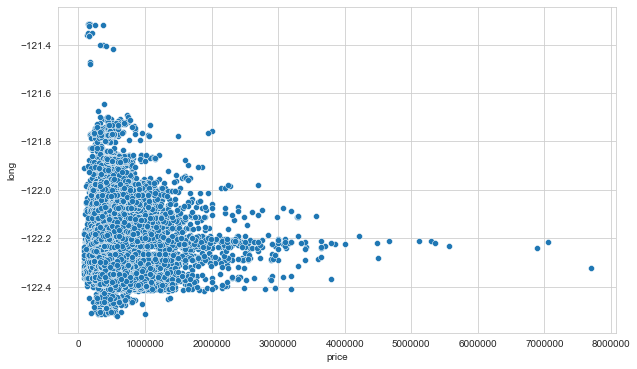

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='long', data=df)

If there was no real correlation on the longitude, we would expect a blob of data points. But it seems here that there is an expensive housing area at longitude -122.2. Let's repeat this for latitude. 

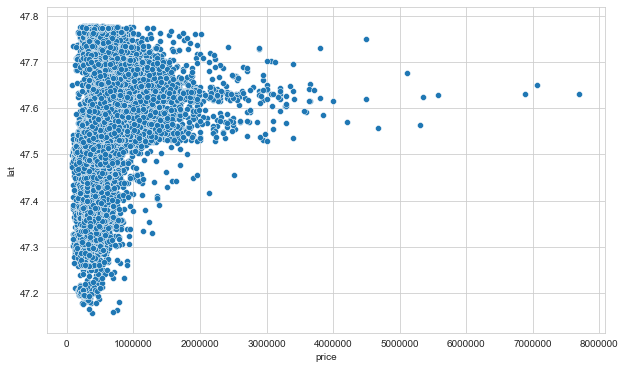

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='lat', data=df)

So there also seems to be some sort of expensive housing area based on latitude. 

So let's plot out latitude and longitude together and change the hue. 

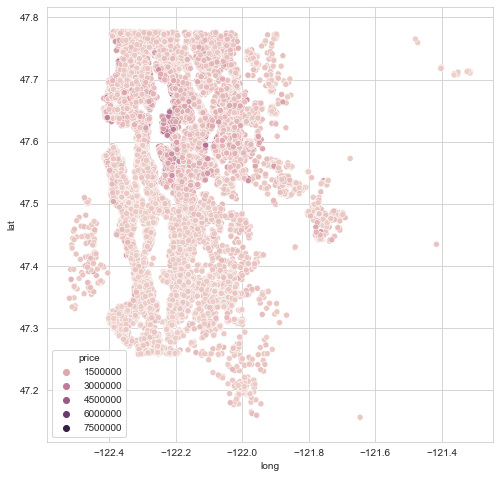

In [54]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

So changing the hue allowed us to begin to see where the expensive areas are and it matches up with the other plots. 

However, we are not getting as good of a color gradient as we could. This is because of the outlier houses, and also because we have marker edges, so let's clean up the map by dropping some of the outliers. 

In [55]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


Notice how quickly the prices of the homes drop among the most expensive homes. So maybe we can drop out the top 1% of the most expensive homes. This would be about 215 houses. Let's make a new dataframe.

In [56]:
bot_99_perc = df.sort_values('price', ascending=False).iloc[216:]

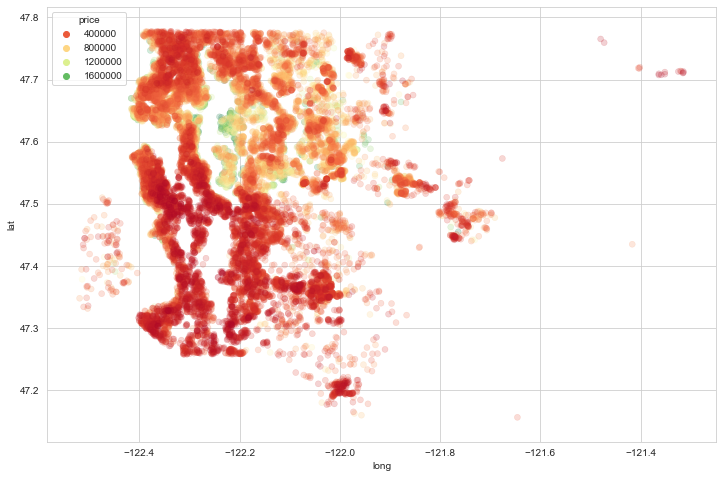

In [57]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=bot_99_perc, edgecolor=None, alpha=0.2, palette='RdYlGn', hue='price')

Now we can see a lot clearer color distribution. 

Another thing we can do here is make a box plot if a house is on the waterfront or not since it is one of our features. 

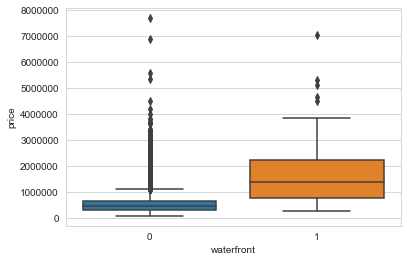

In [58]:
sns.boxplot(x='waterfront', y='price', data=df)

Here we see that house that are on a waterfront tend to be more expensive. Although, curously, the most expensive house is not on a waterfront. 

Lets now start feature engineering and start to get rid of features that are not useful to us. 

Here we can drop the ID column because it doesn't really help us accomplish anything. 

In [59]:
df = df.drop('id', axis=1)

If we now look at the date column, we notices that it is some sort of string. We can convert to a date time object. Once that it is a date time object, we can extra information from it very easily. 

In [60]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [61]:
df['date'] = pd.to_datetime(df['date'])

In [62]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

Note that the formatting is different and reports back a datetime object. We can extract the year component and the day component off these datetime objects. 

In [63]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [64]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


Now we can do more useful data exploration analysis to see if these are actually useful. Let's see if there is any variation based off the month the houses are selling at. 

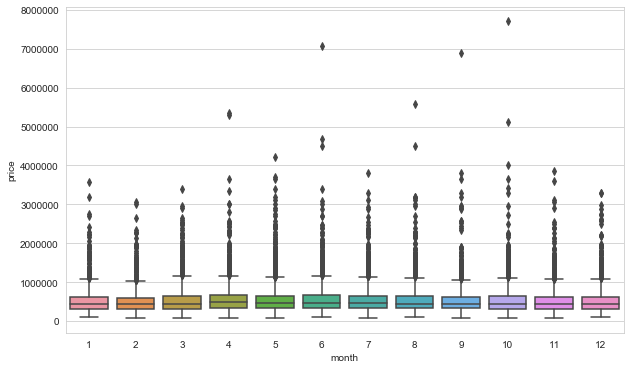

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=df)

It is hard to tell from this plit along if there is any significant distribution differences between the months you may sell the house at. What might be easier to do is just see the numbers themselves. 

In [66]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

And if we wanted to see these numbers visually:

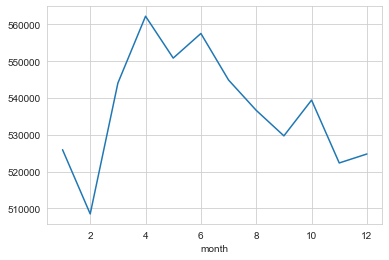

In [67]:
df.groupby('month').mean()['price'].plot()

It looks like there might be some sort of pattern but it's not really a huge range. Lets look at the year.

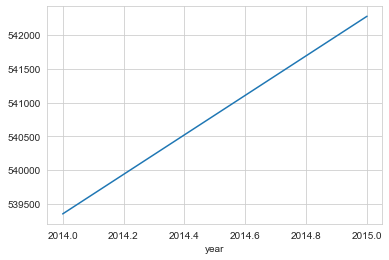

In [68]:
df.groupby('year').mean()['price'].plot()

This makes sense because you would natually expect prices of homes to increase as time went on. 

We will drop off the date column since it is no longer useful to us since we featured engineered the year and month columns

In [69]:
df = df.drop('date', axis=1)

If we take a closer look at our data, we notice that a lot of them are pretty good and makes sense. However, there is also a zipcode column. Since those are numbers, if we feed it into our model, the model will assume that it is some sort of continuous feature, and think that zipcode 98178 is greater than 98125. This may or may not be relevant depending on how the zipcodes are laid out. This is where domain experience comes into play. If you look at a map of the county with the zip codes, there doesn't seem to be a clear continuous distribution of the zip codes, which means you would want to start treating this as a categorical variable. So now we should explore it to see if it is viable to keep as some sort of category. 

In [70]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

We see we have 70 different zip codes, which is too many to make dummy variables for and have 70 different categories. If we had more domain knowledge, maybe we could group them into expensive zip codes and less expensive zip codes, or something else that was relavent. 

In [71]:
df = df.drop('zipcode', axis=1)

The next column that will cause issues is the year renovated. If we look at the value counts, we see that most of them are 0, meaning they weren't renovated. The rest of the values are years that house was renovated. What might make sense is turn it into a column of 0s and 1s indicating if it was renovated or not, ignoring the year. However, if we think about what the data means, we realize that the more recent something was renovated, the higher price that it would likely go for. And we can think of '0' as a year, which would naturally have a lower score since the house wasn't renovated. In this case, we got sort of lucky and are able to leave the data alone. 

We also have a similar sitation with the square feet basement feature, where there are 0s in a lot of places. That means there is no basement. However, a home without a basement would probably go for less money than the exact house with a basement. 

Now we are going to split and train our data

In [72]:
X = df.drop('price', axis=1)
y = df['price'].values # returns the numpy array rather than a data series

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

We have now split the data, and now we are going to scale it. We want to scale the data after the split that way we only fit to the training set and prevent any data leakage. 

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
X_train = scaler.fit_transform(X_train) # fit and transform in one step, rather than two

In [78]:
X_test = scaler.transform(X_test) # Remember we don't want to fit to our test set, only scale it. 

Now we are going to create the model

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

To create a sequential model, typically what we do is try to base the number of neurons in our layers from the size of our actual feature data. The shape of our data is:

In [80]:
X_train.shape

(15117, 19)

So we have 19 incoming features. So then we should have 19 neurons. We are also going to have four layers, which might be overkill and overfit our training data, but we are going to explore if that is happening by passing in validation data along with our training. 

In [81]:
model = Sequential()

model.add(Dense(19, activation='relu')) # relu = rectified linear unit
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1)) # Final layer that is our price

model.compile(optimizer='adam', loss='mse')

Now it is time to train the model. We are going to pass in X_train and y_train as well as validation data. After each epoch of training on the training data, it will quickly run the test data and check the loss on the test data. So that way we can keep a tracking of how well performing the model is not only on the training data, but also the test data. Keep in mind that the test data will not actually impact the weights or biases of the network. So Keras isn't going to update the model based on the validation data. We are also going to pass in data in batches. Batch size is by convention a power of 2. The smaller the batch size, the longer training will take but the less likely you are to overfit the data. 

In [82]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 430233419776.0000 - val_loss: 418866069504.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 428178341888.0000 - val_loss: 411546189824.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 399354331136.0000 - val_loss: 346963640320.0000
Epoch 4/400
119/119 [==============================] - 0s 958us/step - loss: 276332937216.0000 - val_loss: 174928789504.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 126713610240.0000 - val_loss: 96298467328.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 98045952000.0000 - val_loss: 93656817664.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 95882321920.0000 - val_loss: 91913887744.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 93991067648.0000 - val_loss: 90084032512.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 910us/step - loss: 36905095168.0000 - val_loss: 35674042368.0000
Epoch 68/400
119/119 [==============================] - 0s 853us/step - loss: 36684091392.0000 - val_loss: 35436912640.0000
Epoch 69/400
119/119 [==============================] - 0s 860us/step - loss: 36582445056.0000 - val_loss: 35318071296.0000
Epoch 70/400
119/119 [==============================] - 0s 952us/step - loss: 36405522432.0000 - val_loss: 35105644544.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 36255916032.0000 - val_loss: 34954489856.0000
Epoch 72/400
119/119 [==============================] - 0s 896us/step - loss: 36102914048.0000 - val_loss: 34867245056.0000
Epoch 73/400
119/119 [==============================] - 0s 871us/step - loss: 36008980480.0000 - val_loss: 34722164736.0000
Epoch 74/400
119/119 [==============================] - 0s 971us/step - loss: 35873890304.0000 - val_loss: 34652950528.0000
Epoch 75/400
119/119 [=

119/119 [==============================] - 0s 901us/step - loss: 32590936064.0000 - val_loss: 31054118912.0000
Epoch 134/400
119/119 [==============================] - 0s 855us/step - loss: 32577292288.0000 - val_loss: 30806632448.0000
Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 32510902272.0000 - val_loss: 30794833920.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 32477417472.0000 - val_loss: 30735151104.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 32389056512.0000 - val_loss: 30932314112.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 32490549248.0000 - val_loss: 30730442752.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32358973440.0000 - val_loss: 30658500608.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 32332611584.0000 - val_loss: 30612467712.0000
Epoch 141/400
119/119 [===

Epoch 199/400
119/119 [==============================] - 0s 1ms/step - loss: 31195602944.0000 - val_loss: 29192355840.0000
Epoch 200/400
119/119 [==============================] - 0s 1ms/step - loss: 31205859328.0000 - val_loss: 29172283392.0000
Epoch 201/400
119/119 [==============================] - 0s 1ms/step - loss: 31155879936.0000 - val_loss: 29186871296.0000
Epoch 202/400
119/119 [==============================] - 0s 972us/step - loss: 31172157440.0000 - val_loss: 29144653824.0000
Epoch 203/400
119/119 [==============================] - 0s 955us/step - loss: 31126413312.0000 - val_loss: 29181048832.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 31150616576.0000 - val_loss: 29107085312.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 31107489792.0000 - val_loss: 29134909440.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 31086524416.0000 - val_loss: 29051279360.0000
Epoch 207/40

119/119 [==============================] - 0s 873us/step - loss: 30472015872.0000 - val_loss: 28303994880.0000
Epoch 265/400
119/119 [==============================] - 0s 829us/step - loss: 30529939456.0000 - val_loss: 28302596096.0000
Epoch 266/400
119/119 [==============================] - 0s 822us/step - loss: 30520682496.0000 - val_loss: 28385503232.0000
Epoch 267/400
119/119 [==============================] - 0s 837us/step - loss: 30466777088.0000 - val_loss: 28282613760.0000
Epoch 268/400
119/119 [==============================] - 0s 858us/step - loss: 30457249792.0000 - val_loss: 28333903872.0000
Epoch 269/400
119/119 [==============================] - 0s 911us/step - loss: 30429902848.0000 - val_loss: 28358160384.0000
Epoch 270/400
119/119 [==============================] - 0s 839us/step - loss: 30456664064.0000 - val_loss: 28299978752.0000
Epoch 271/400
119/119 [==============================] - 0s 873us/step - loss: 30390849536.0000 - val_loss: 28222513152.0000
Epoch 272/400


Epoch 330/400
119/119 [==============================] - 0s 1ms/step - loss: 29996156928.0000 - val_loss: 27628685312.0000
Epoch 331/400
119/119 [==============================] - 0s 995us/step - loss: 29990533120.0000 - val_loss: 27595089920.0000
Epoch 332/400
119/119 [==============================] - 0s 1ms/step - loss: 29993492480.0000 - val_loss: 27584772096.0000
Epoch 333/400
119/119 [==============================] - 0s 1ms/step - loss: 29974444032.0000 - val_loss: 27586205696.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 29974075392.0000 - val_loss: 27580018688.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 29952477184.0000 - val_loss: 27593578496.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 29978402816.0000 - val_loss: 27624771584.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 29967470592.0000 - val_loss: 27559917568.0000
Epoch 338/400


119/119 [==============================] - 0s 911us/step - loss: 29538484224.0000 - val_loss: 27056594944.0000
Epoch 397/400
119/119 [==============================] - 0s 886us/step - loss: 29563281408.0000 - val_loss: 27085352960.0000
Epoch 398/400
119/119 [==============================] - 0s 887us/step - loss: 29541019648.0000 - val_loss: 27058710528.0000
Epoch 399/400
119/119 [==============================] - 0s 942us/step - loss: 29506193408.0000 - val_loss: 27195561984.0000
Epoch 400/400
119/119 [==============================] - 0s 882us/step - loss: 29521778688.0000 - val_loss: 27189559296.0000


In [83]:
losses = pd.DataFrame(model.history.history)

In the dataframe we have the mse of the model. The val_loss is the loss of the validation data (our test set). Now we can directly compare the loss on the training and the loss on the validation data to see if we are overfitting. We do this by plotting. 

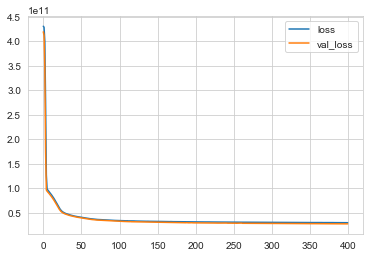

In [84]:
losses.plot()

So we see that both fall down sharply and more importantly we do not see an increase in the validation loss. What this means, technically, is that we could have continued training, although we really weren't improving that much. 

So now let's do some evaluation on our test data

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [86]:
predictions = model.predict(X_test)

So now we have our model's predictions of X_test and we can compare to the actual values (y_test).

In [87]:
mean_squared_error(y_test, predictions)

27189561734.457195

The MSE is that large number, and it is large because we are dealing with the price of houses (and it is squared). We can better understand this number by finding the RMSE.

In [88]:
np.sqrt(mean_squared_error(y_test, predictions))

164892.57634732133

Or we can get mean absolute error

In [89]:
mean_absolute_error(y_test, predictions)

103326.19345100308

So it seems that on average we are off by about $100,000. Is that good or bad? Again we have to take into account the actual data frame itself. So let's looks at the price column of our dataframe and see what kind of values we are dealing with. 

In [90]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

So we see that the average price of the houses is about $540,000. So our model really isn't that great, but not horrible. We can use the explained variance score to get a deeper understanding of our metrics. 

The best possible score is 1.0. Lower scores are worse. What this does is tell you how much variance is being explain by your actual model. 

In [91]:
explained_variance_score(y_test, predictions)

0.7962903576761431

0.8 is ok, but it really depends on the context. Do we have a previous model that actually works better? Maybe we keep training. 

Another thing to we is compare our predictions and plot them against a perfect fit. In a perfect world, this would be a straight line. We can show this by plotting y_test against itself.

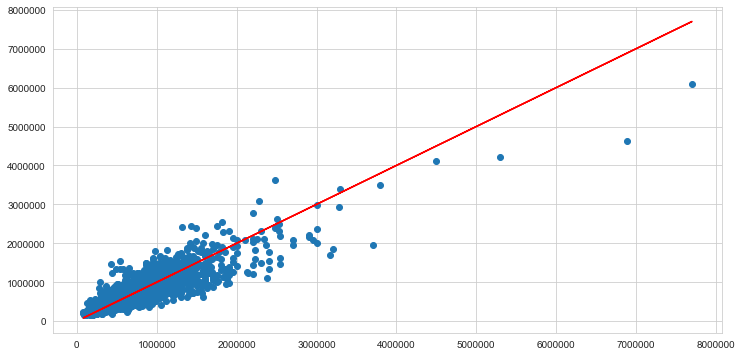

In [92]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

You will notive that we are being punished by the outliers. We notice that we are actually pretty good of predicting housing costs up to $2M. What may be worth it is to retrain our model on the bottom 99% of data. Whether or not you do this depends really on what question you are trying to answer. 

Finally, let's predict a price of a brand new house. Let's look at the features. 

In [93]:
single_house = df.drop('price',axis=1).iloc[0]

These are the only features of a new house on the market. Recall that our model is trained on scaled versions of the features, which means we can't actually pass in these features raw. First we have to reshape it then we can scale it. 

In [94]:
single_house = scaler.transform(single_house.values.reshape(-1,19)) 
# the reshape is to make the array the correct shape, the -1 just means to keep the same dimensions along that axis

In [95]:
model.predict(single_house)

array([[291087.8]], dtype=float32)

In [96]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


So the model predicted \\$283,407 and the true price is \\$221,900. We are overshooting here, and that is likely an issue because we tried to fit to the extreme values. 

An interesting next step would be to train a different model based only on the bottom 99% of housing prices. 

# Keras Classification

## Part One

This lecture will show how to perform a classifiation task with TensorFlow. We will also focus on how to identify and deal with overfitting through Early Stopping Callbacks and Dropout Layers. 

Early Stopping
- Keras can automatically stop training based on a loss condition on the validation data passes during the model.fit() call. 

Dropout Layers
- Dropout can be added to layers to "turn off" neurons during training to prevent overfitting. 
- Each Dropout layer will "drop" a user-defined percentage of neuron units in the previous layer every batch

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns

We are going to work with data on tumors and try to figure out if they are malignant or benign. 

In [98]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [101]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


For classification analysis, it is always a good idea to do a count plot of your actual label to see the number of instances per label to see if it a well balanced problem or not. 

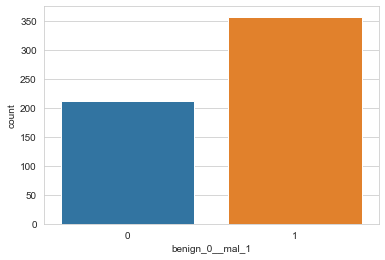

In [102]:
sns.countplot(x='benign_0__mal_1', data=df)

The data seems to be decently well balanced. We definitely have more malignant tumors and benign tumors but the difference is not extreme. 

What else we can do is check out the correlation of the features themself. 

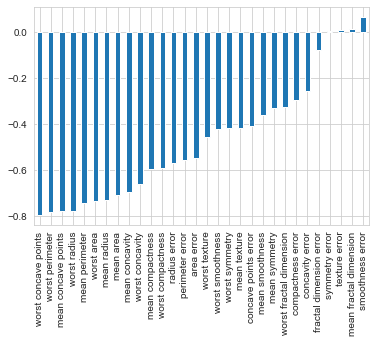

In [107]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

So it looks like we have some very highly negative correlated values so we should be able to get pretty strong predictions from this data set just based off this analysis. 

We can also look at the correlation of the features themselves by looking at a heatmap. 

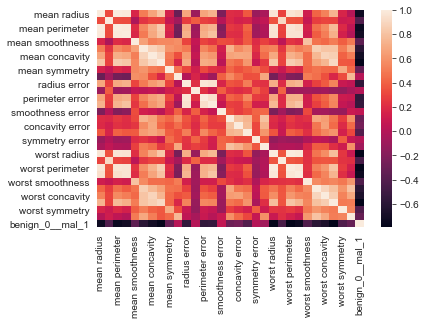

In [108]:
sns.heatmap(df.corr())

Now let's get into splitting and training the data. 

In [109]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [112]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
scaler = MinMaxScaler()

In [114]:
X_train = scaler.fit_transform(X_train)

In [115]:
X_test = scaler.transform(X_test)

## Part Two

In [118]:
from tensorflow.keras import Sequential

In [120]:
from tensorflow.keras.layers import Dense, Dropout

In [121]:
X_train.shape

(426, 30)

We have 436 rows and 30 features

In [122]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [123]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6544 - val_loss: 0.6439
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6267 - val_loss: 0.6203
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6004 - val_loss: 0.5911
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5691 - val_loss: 0.5559
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5338 - val_loss: 0.5176
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4944 - val_loss: 0.4743
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4485 - val_loss: 0.4247
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4035 - val_loss: 0.3772
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3596 - val_loss: 0.3349
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3232 - val_loss: 0.2987
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1126
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.1091
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.1112
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1110
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1077
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.1133
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.1093
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0557 - val_loss: 0.1069
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.1149
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.1069
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0446 - val_loss: 0.1274
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0434 - val_loss: 0.1188
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0427 - val_loss: 0.1315
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0492 - val_loss: 0.1292
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0416 - val_loss: 0.1188
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0403 - val_loss: 0.1307
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0419 - val_loss: 0.1293
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0429 - val_loss: 0.1273
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0421 - val_loss: 0.1259
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0404 - val_loss: 0.1232
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0360 - val_loss: 0.1386
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0353 - val_loss: 0.1470
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0353 - val_loss: 0.1386
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0366 - val_loss: 0.1455
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0353 - val_loss: 0.1394
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0384 - val_loss: 0.1328
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0352 - val_loss: 0.1384
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0372 - val_loss: 0.1394
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0367 - val_loss: 0.1328
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0377 - val_loss: 0.1406
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0328 - val_loss: 0.1388
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0333 - val_loss: 0.1586
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0316 - val_loss: 0.1486
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0375 - val_loss: 0.1761
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0329 - val_loss: 0.1426
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0305 - val_loss: 0.1558
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0353 - val_loss: 0.1496
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0338 - val_loss: 0.1438
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0299 - val_loss: 0.1581
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0342 - val_loss: 0.1569
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0275 - val_loss: 0.1781
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.1561
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0267 - val_loss: 0.1649
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0256 - val_loss: 0.1590
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0288 - val_loss: 0.1810
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0284 - val_loss: 0.1527
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0278 - val_loss: 0.1740
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0271 - val_loss: 0.1593
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0261 - val_loss: 0.1647
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0256 - val_loss: 0.1663
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.1866
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.1832
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0255 - val_loss: 0.1898
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0260 - val_loss: 0.1796
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 0.1947
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0232 - val_loss: 0.1779
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0224 - val_loss: 0.1890
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0225 - val_loss: 0.1793
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0227 - val_loss: 0.1809
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0220 - val_loss: 0.1760
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0210 - val_loss: 0.1931
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0199 - val_loss: 0.2074
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0205 - val_loss: 0.2173
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0205 - val_loss: 0.1975
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0203 - val_loss: 0.2052
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0200 - val_loss: 0.2015
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.2039
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0207 - val_loss: 0.2167
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0238 - val_loss: 0.1968
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0200 - val_loss: 0.2142
Epoc

Now let's plot out our loss, and since we passed in validation data, we can plot that as well. 

In [124]:
losses = pd.DataFrame(model.history.history)

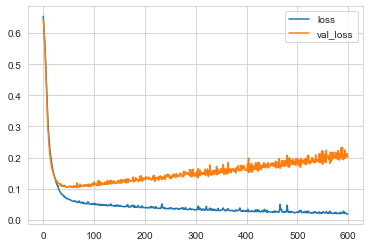

In [126]:
losses.plot()

This is a perfect example of overfitting. A key characteristic of overfitting is when the loss in the training data is still decreasing while the validation loss is increasing. This tells us we are overfittig to our training data set. We have too many epochs, so we are going to use early stopping. 

We want to start fresh so we will start by remaking the model. 

In [127]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [128]:
from tensorflow.keras.callbacks import EarlyStopping

With EarlyStopping, we have to select a metric to monitor. In our case, that is validation loss.

In [129]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [130]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6800 - val_loss: 0.6641
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6400 - val_loss: 0.6267
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5986 - val_loss: 0.5854
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5558 - val_loss: 0.5422
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5089 - val_loss: 0.4903
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4555 - val_loss: 0.4346
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4038 - val_loss: 0.3819
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3536 - val_loss: 0.3379
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3143 - val_loss: 0.2996
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2822 - val_loss: 0.2714
Epoch 11/

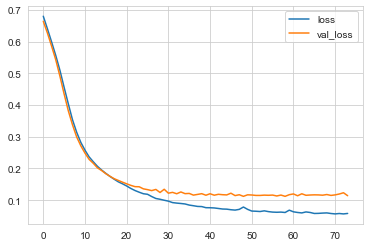

In [131]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

The flattening out is ok behavior, but we really want to stop the increase. 

The next thing we can do to prevent overfitting is add in dropout layers. This turns off a percentage of neurons randomly. 

In [132]:
from tensorflow.keras.layers import Dropout

In [134]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) # Randomly, half the neurons will be turned off

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [135]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.7251 - val_loss: 0.6941
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6930 - val_loss: 0.6869
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6903 - val_loss: 0.6786
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6833 - val_loss: 0.6686
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6600 - val_loss: 0.6558
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6425 - val_loss: 0.6352
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6216 - val_loss: 0.5961
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6015 - val_loss: 0.5530
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5692 - val_loss: 0.5200
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5507 - val_loss: 0.4812
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1046 - val_loss: 0.0895
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1118 - val_loss: 0.0938
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1213 - val_loss: 0.0910
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1224 - val_loss: 0.1039
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1353 - val_loss: 0.0904
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1089 - val_loss: 0.0876
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1059 - val_loss: 0.0911
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1025 - val_loss: 0.0907
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0889 - val_loss: 0.0878
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0930 - val_loss: 0.0880
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0910 - val_loss: 0.0847
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0911 - val_loss: 0.0902
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0822 - val_loss: 0.0953
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0933 - val_loss: 0.1060
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0732 - val_loss: 0.0945
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0706 - val_loss: 0.0865
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0866 - val_loss: 0.0877
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0764 - val_loss: 0.1151
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0735 - val_loss: 0.0867
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0865 - val_loss: 0.0825
Epoc

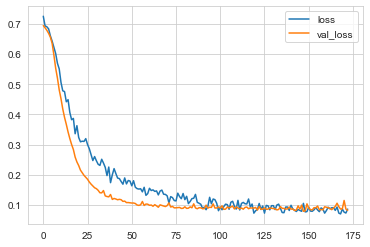

In [136]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

This is even better behavior because they are both decreasing and flattening out about the same time.

Let's now do an evaluation on our classes. Remember we are basically trying to predict a 0 or 1. 

In [139]:
predictions = model.predict_classes(X_test)

In [140]:
from sklearn.metrics import classification_report, confusion_matrix

In [141]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.99      1.00      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [142]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 0 88]]


So our network only misclassified one data point in our test set. 